1. Analyze and Preprocess data - Check if the dataset has missing values or has any other problem.
2. Feature Engineering
3. Sampling Your Data
4. Build Model
    4. a. Try DecisionTree, RandomForest
    4. b. Try other tree-based model like: XGBoost, CatBoost
5. Perform model on training set and test set using gridsearch CV
6. Measure performance of the model.
7. Which metric is your main metric for this problem and why? What is your main model as well as their params and why?


How can I measure your point:
1. Your function is callable and runs correctly
2. The performance of your model (in full pipeline) is acceptable.
3. The data preprocessing is correct or make sense
4. The Feature engineering is correct or make sense
5. Any other additional process will be considered a small plus point.

Churn rate is a marketing metric that describes the number of customers who leave a business over a specific time period. Every user is assigned a prediction value that estimates their state of churn at any given time. This value is based on:

User demographic information
Browsing behavior
Historical purchase data among other information
It factors in our unique and proprietary predictions of how long a user will remain a customer. This score is updated every day for all users who have a minimum of one conversion. The values assigned are between 1 and 5.

Churn - it is most commonly expressed as the percentage of service subscribers who discontinue their subscriptions within a given time period

customer_id - Represents the unique identification number of a customer

Name - Represents the name of a customer

age - Represents the age of a customer

security_no - Represents a unique security number that is used to identify a person

region_category - Represents the region that a customer belongs to

membership_category - Represents the category of the membership that a customer is using

joining_date - Represents the date when a customer became a member

joined_through_referral - Represents whether a customer joined using any referral code or ID

referral_id - Represents a referral ID

preferred_offer_types - Represents the type of offer that a customer prefers

medium_of_operation - Represents the medium of operation that a customer uses for transactions

internet_option - Represents the type of internet service a customer uses

last_visit_time - Represents the last time a customer visited the website

days_since_last_login - Represents the no. of days since a customer last logged into the website

avg_time_spent - Represents the average time spent by a customer on the website

avg_transaction_value - Represents the average transaction value of a customer

avg_frequency_login_days - Represents the no. of times a customer has logged in to the website

points_in_wallet - Represents the points awarded to a customer on each transaction

used_special_discount - Represents whether a customer uses special discounts offered

offer_application_preference - Represents whether a customer prefers offers

past_complaint - Represents whether a customer has raised any complaints

complaint_status - Represents whether the complaints raised by a customer was resolved

feedback - Represents the feedback provided by a customer

churn_risk_score - Represents the churn risk score that ranges from 1 to 5

## Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
df = pd.read_csv("HomeWork-churn_rate_prediction.csv")
df.head()
#ToDo: Show histogram of dataframe

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


In [3]:
df = df.drop(['customer_id','Name','security_no'],axis=1)
df.head()
df.shape

(36992, 22)

In [4]:
def check_null_nan(col, cate = False):
    if cate == True:
        print('so luong cua tung loai trong cot: ')
        print(col.value_counts())
    if col.isnull().sum() != 0:
        print(f'so luong Null trong cot: {col.isnull().sum()}')
    else:
        print('khong co Null nao trong cot')
    if col.isna().sum() != 0:
        print(f'so luong NaN trong cot: {col.isna().sum()}')
    else:
        print('khong co NaN nao trong cot')

## Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           36992 non-null  int64  
 1   gender                        36992 non-null  object 
 2   region_category               31564 non-null  object 
 3   membership_category           36992 non-null  object 
 4   joining_date                  36992 non-null  object 
 5   joined_through_referral       36992 non-null  object 
 6   referral_id                   36992 non-null  object 
 7   preferred_offer_types         36704 non-null  object 
 8   medium_of_operation           36992 non-null  object 
 9   internet_option               36992 non-null  object 
 10  last_visit_time               36992 non-null  object 
 11  days_since_last_login         36992 non-null  int64  
 12  avg_time_spent                36992 non-null  float64
 13  a

In [6]:
df.columns

Index(['age', 'gender', 'region_category', 'membership_category',
       'joining_date', 'joined_through_referral', 'referral_id',
       'preferred_offer_types', 'medium_of_operation', 'internet_option',
       'last_visit_time', 'days_since_last_login', 'avg_time_spent',
       'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet',
       'used_special_discount', 'offer_application_preference',
       'past_complaint', 'complaint_status', 'feedback', 'churn_risk_score'],
      dtype='object')

### Age

In [7]:
check_null_nan(df['age'])

khong co Null nao trong cot
khong co NaN nao trong cot


c:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='count'>

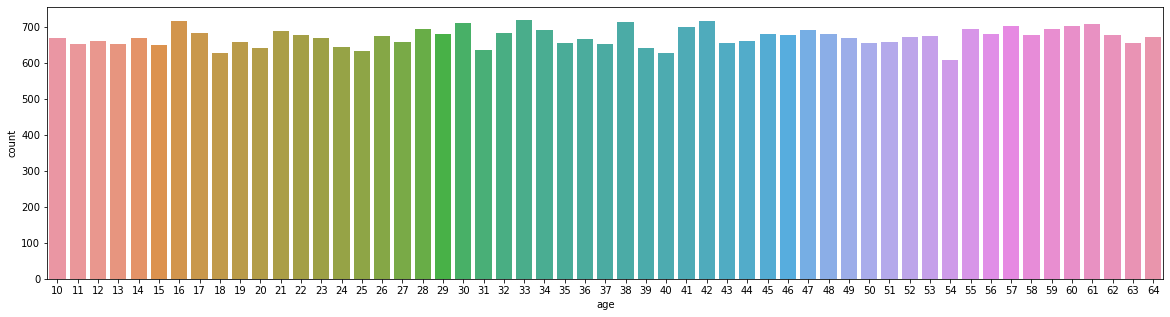

In [8]:
plt.figure(figsize = (20,5))
sns.countplot(df['age'])

### Churn_risk_score

<AxesSubplot:>

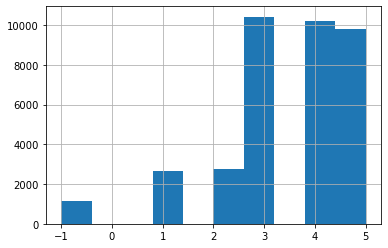

In [9]:
# theo thong tin bo du lieu thi churn risk score 1 - 5. co the bi ghi nham thanh -1
df['churn_risk_score'].hist()

<AxesSubplot:>

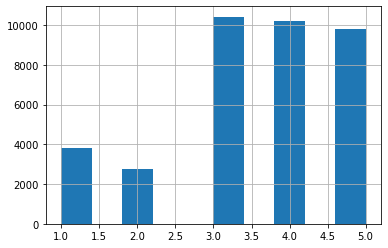

In [10]:
# bi nham 1 thanh -1
new_df = df.copy()
new_df['churn_risk_score'] = df['churn_risk_score'].replace(-1,1)
new_df['churn_risk_score'].hist()

In [11]:
check_null_nan(new_df['churn_risk_score'],True)

so luong cua tung loai trong cot: 
3    10424
4    10185
5     9827
1     3815
2     2741
Name: churn_risk_score, dtype: int64
khong co Null nao trong cot
khong co NaN nao trong cot


### Gender

In [12]:
check_null_nan(new_df['gender'],True)

so luong cua tung loai trong cot: 
F          18490
M          18443
Unknown       59
Name: gender, dtype: int64
khong co Null nao trong cot
khong co NaN nao trong cot


In [13]:
# co cot unknown so luong kha it nen xoa luonn
new_df = new_df[new_df['gender'] != 'Unknown']

c:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

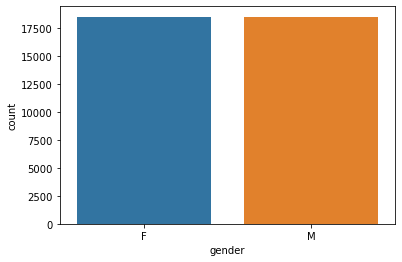

In [14]:
sns.countplot('gender', data = new_df)

### region category

In [15]:
check_null_nan(new_df['region_category'],True)

so luong cua tung loai trong cot: 
Town       14099
City       12721
Village     4693
Name: region_category, dtype: int64
so luong Null trong cot: 5420
so luong NaN trong cot: 5420


<AxesSubplot:ylabel='region_category'>

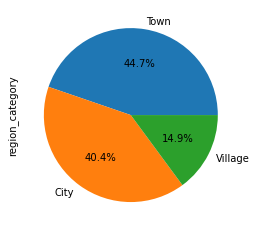

In [16]:
new_df['region_category'].value_counts().plot.pie(autopct='%1.1f%%')

### membership_category

In [17]:
check_null_nan(new_df['membership_category'],True)

so luong cua tung loai trong cot: 
Basic Membership       7710
No Membership          7681
Gold Membership        6785
Silver Membership      5979
Premium Membership     4444
Platinum Membership    4334
Name: membership_category, dtype: int64
khong co Null nao trong cot
khong co NaN nao trong cot


c:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


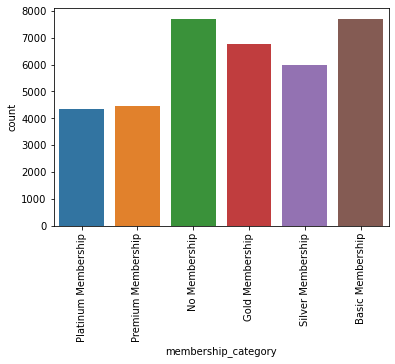

In [18]:
sns.countplot(new_df['membership_category'])
plt.xticks(rotation = 90)
plt.show()

### joined through referral

In [19]:
check_null_nan(new_df['joined_through_referral'],True)

so luong cua tung loai trong cot: 
No     15816
Yes    15689
?       5428
Name: joined_through_referral, dtype: int64
khong co Null nao trong cot
khong co NaN nao trong cot


co cot ? ngoai yes va no ma ta co joined_through_referral yes neu referral_id co va nguoc lai

In [20]:
for i, j in zip(new_df.joined_through_referral, new_df.referral_id):
  if (i == '?') and (j != 'xxxxxxxx'):
           new_df['joined_through_referral'] = new_df['joined_through_referral'].replace('?', 'Yes')
  else:
        pass

cot joined_through_referral no phuc thuoc vao cot referral. neu cot referral xxxx nghia la cot joined_through_referral bang no

In [21]:
check_null_nan(new_df['joined_through_referral'],True)

so luong cua tung loai trong cot: 
Yes    21117
No     15816
Name: joined_through_referral, dtype: int64
khong co Null nao trong cot
khong co NaN nao trong cot


nen sau khi thay the xong thi cot referral khong can thiet nua

In [22]:
new_df.drop('referral_id', axis = 1, inplace = True)

### preferred offer types

In [23]:
check_null_nan(new_df['preferred_offer_types'],True)

so luong cua tung loai trong cot: 
Gift Vouchers/Coupons       12322
Credit/Debit Card Offers    12256
Without Offers              12068
Name: preferred_offer_types, dtype: int64
so luong Null trong cot: 287
so luong NaN trong cot: 287


<AxesSubplot:ylabel='preferred_offer_types'>

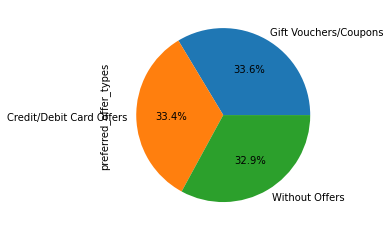

In [24]:
new_df['preferred_offer_types'].value_counts().plot.pie(autopct='%1.1f%%')

### medium of operation va internet option

In [25]:
check_null_nan(new_df['medium_of_operation'],True)

so luong cua tung loai trong cot: 
Desktop       13893
Smartphone    13855
?              5379
Both           3806
Name: medium_of_operation, dtype: int64
khong co Null nao trong cot
khong co NaN nao trong cot


medium_of_operation co kha nhieu dong ?

In [26]:
check_null_nan(new_df['internet_option'],True)

so luong cua tung loai trong cot: 
Wi-Fi          12393
Mobile_Data    12327
Fiber_Optic    12213
Name: internet_option, dtype: int64
khong co Null nao trong cot
khong co NaN nao trong cot


kiem tra voi tung loai trong internet_option thi loai nao cua medium_of_operation cao nhat thi ta thay the no. so cot ? kha lon nen se khong xoa 

In [27]:
wifi = new_df[(new_df['internet_option'] == 'Wi-Fi')] 
wifi['medium_of_operation'].value_counts()

Desktop       4708
Smartphone    4592
?             1798
Both          1295
Name: medium_of_operation, dtype: int64

In [28]:
Mobile_Data = new_df[(new_df['internet_option'] == 'Mobile_Data')] 
Mobile_Data['medium_of_operation'].value_counts()

Desktop       4620
Smartphone    4602
?             1845
Both          1260
Name: medium_of_operation, dtype: int64

In [29]:
Fiber_Optic = new_df[(new_df['internet_option'] == 'Fiber_Optic')] 
Fiber_Optic['medium_of_operation'].value_counts()

Smartphone    4661
Desktop       4565
?             1736
Both          1251
Name: medium_of_operation, dtype: int64

c:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='internet_option', ylabel='count'>

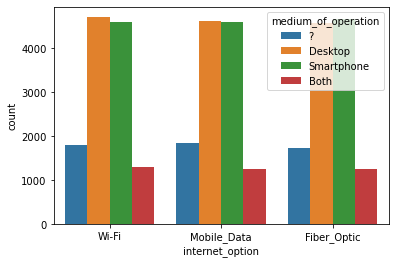

In [30]:
sns.countplot(new_df['internet_option'], hue = new_df['medium_of_operation'])

phan lon khach hang co 'internet_option' = 'Wi-Fi' thi 'medium_of_operation' cua khach hang su dung 'Desktop' nhieu nhat theo phan tich tren, nen ta se thay the '?' bang 'Desktop'.

phan lon khach hang co 'internet_option' = Fiber_Optic' thi 'medium_of_operation' cua khach hang su dung 'Smartphone' nhieu nhat theo phan tich tren, nen ta thay the '?' bang 
'Smartphone'

phan lon khach hang co 'internet_option' = 'Mobile_Data' thi co nhieu 'medium_of_operation' cua khach hang su dung 'Desktop' nhieu nhat theo phan tich tren, nen ta thay the '?' bang 'Desktop'

In [31]:
wifi_boolean = (new_df['medium_of_operation'] == '?') & (new_df['internet_option'] == 'Wi-Fi')
new_df['medium_of_operation'] = np.where((wifi_boolean), 'Desktop', new_df['medium_of_operation'])

fiber_optic_boolean = (new_df['medium_of_operation'] == '?') & (new_df['internet_option'] == 'Fiber_Optic')
new_df['medium_of_operation'] = np.where((fiber_optic_boolean), 'Smartphone', new_df['medium_of_operation'])

mobile_data_boolean = (new_df['medium_of_operation'] == '?') & (new_df['internet_option'] == 'Mobile_Data')
new_df['medium_of_operation'] = np.where((mobile_data_boolean), 'Smartphone', new_df['medium_of_operation'])

check_null_nan(new_df['medium_of_operation'],True)

so luong cua tung loai trong cot: 
Smartphone    17436
Desktop       15691
Both           3806
Name: medium_of_operation, dtype: int64
khong co Null nao trong cot
khong co NaN nao trong cot


### avg time spent

c:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(-2814.109110069385, 3235.5785210942604)

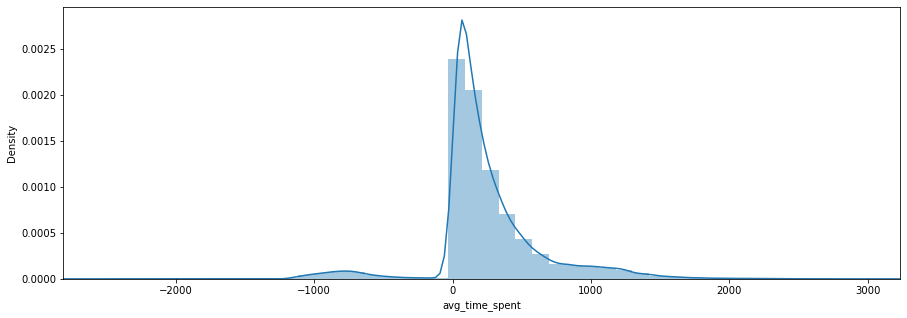

In [32]:
plt.figure(figsize = (15,5))
sns.distplot(new_df['avg_time_spent'])
plt.xlim(new_df['avg_time_spent'].min(),new_df['avg_time_spent'].max())

thoi gian trung binh khong the co so am

In [33]:
# thay the nhung dong co so am thanh Nan
condt = new_df['avg_time_spent'] < 0
new_df['avg_time_spent'] = np.where((condt), np.nan, new_df['avg_time_spent'])

c:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(1.837398812766424, 3235.5785210942604)

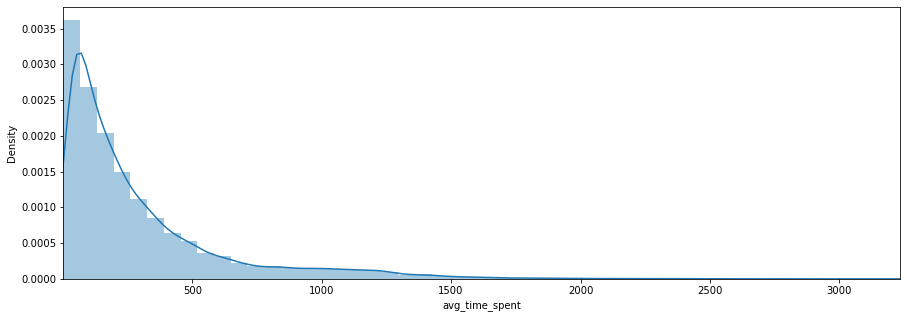

In [34]:
plt.figure(figsize = (15,5))
sns.distplot(new_df['avg_time_spent'])
plt.xlim(new_df['avg_time_spent'].min(),new_df['avg_time_spent'].max())

### days since last login

In [35]:
check_null_nan(new_df['days_since_last_login'])

khong co Null nao trong cot
khong co NaN nao trong cot


c:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(-20.0, 30.0)

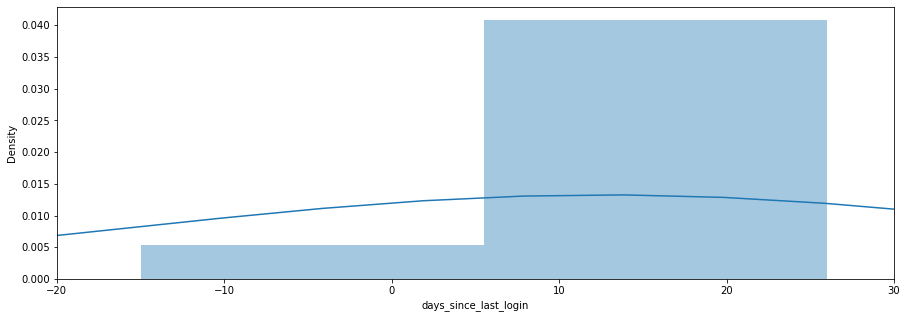

In [36]:
plt.figure(figsize = (15,5))
sns.distplot(new_df['days_since_last_login'])
plt.xlim(-20,30)

o cot nay thi cung khong the co so am

In [37]:
# thay the days_since_last_login bang nan
condt = new_df['days_since_last_login'] < 0
new_df['days_since_last_login'] = np.where((condt), np.nan, new_df['days_since_last_login'])

c:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='avg_transaction_value', ylabel='Density'>

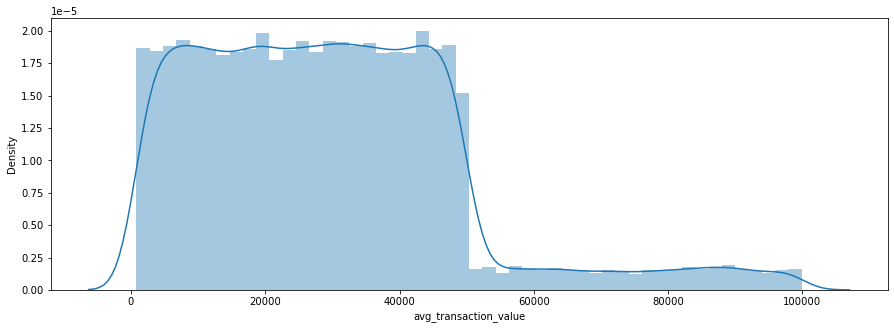

In [38]:
plt.figure(figsize = (15,5))
sns.distplot(new_df['avg_transaction_value'])

### avg transaction value

In [39]:
check_null_nan(new_df['avg_transaction_value'],True)

so luong cua tung loai trong cot: 
29224.20    2
16641.73    2
21969.88    2
38138.54    2
44663.95    2
           ..
30988.05    1
47645.45    1
54224.41    1
4824.94     1
11458.45    1
Name: avg_transaction_value, Length: 36835, dtype: int64
khong co Null nao trong cot
khong co NaN nao trong cot


### avg frequency login days

In [40]:
check_null_nan(new_df['avg_frequency_login_days'],True)

so luong cua tung loai trong cot: 
Error                 3518
13.0                  1392
8.0                   1360
19.0                  1360
14.0                  1351
                      ... 
16.24538221592418        1
2.97022242868195         1
35.40406086655207        1
45.61764978146825        1
1.8361205064894435       1
Name: avg_frequency_login_days, Length: 1650, dtype: int64
khong co Null nao trong cot
khong co NaN nao trong cot


ta thay dong Error tron cot nay. thay thay no thanh Nan

In [41]:
new_df['avg_frequency_login_days'] = new_df['avg_frequency_login_days'].replace('Error', np.nan)


c:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='avg_frequency_login_days', ylabel='Density'>

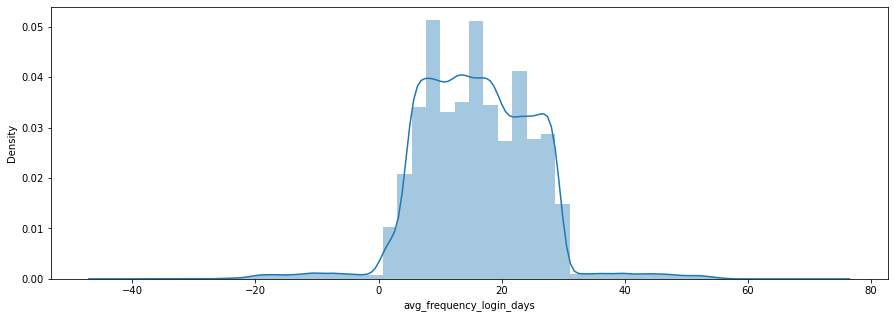

In [42]:
plt.figure(figsize = (15,5))
sns.distplot(new_df['avg_frequency_login_days'])

c:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='avg_frequency_login_days', ylabel='Density'>

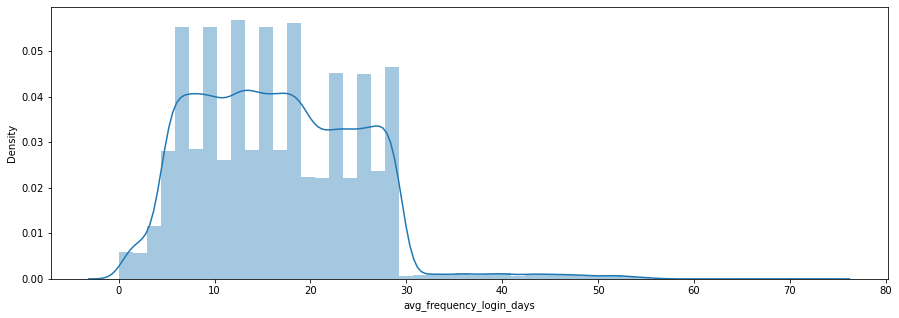

In [43]:
# cot la kieu object nen chuyen no thanh float, sau do thay Error thanh Nan
new_df['avg_frequency_login_days'] = new_df['avg_frequency_login_days'].astype(float)
condt = new_df['avg_frequency_login_days'] < 0 
new_df['avg_frequency_login_days'] = np.where((condt), np.nan, new_df['avg_frequency_login_days'])
plt.figure(figsize = (15,5))
sns.distplot(new_df['avg_frequency_login_days'])

### points in wallets

In [44]:
check_null_nan(new_df['points_in_wallet'],True)

so luong cua tung loai trong cot: 
705.070000     9
780.920000     8
771.750000     7
710.690000     7
760.540000     7
              ..
516.770000     1
1017.094364    1
727.780000     1
767.350000     1
677.660000     1
Name: points_in_wallet, Length: 23675, dtype: int64
so luong Null trong cot: 3434
so luong NaN trong cot: 3434


c:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='points_in_wallet', ylabel='Density'>

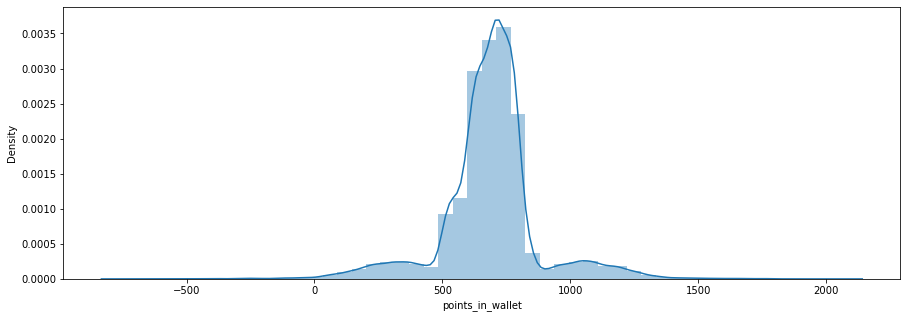

In [45]:
plt.figure(figsize = (15,5))
sns.distplot(new_df['points_in_wallet'])

In [46]:
condt = new_df['points_in_wallet'] < 0
new_df['points_in_wallet'] = np.where((condt), np.nan, new_df['points_in_wallet'])

c:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='points_in_wallet', ylabel='Density'>

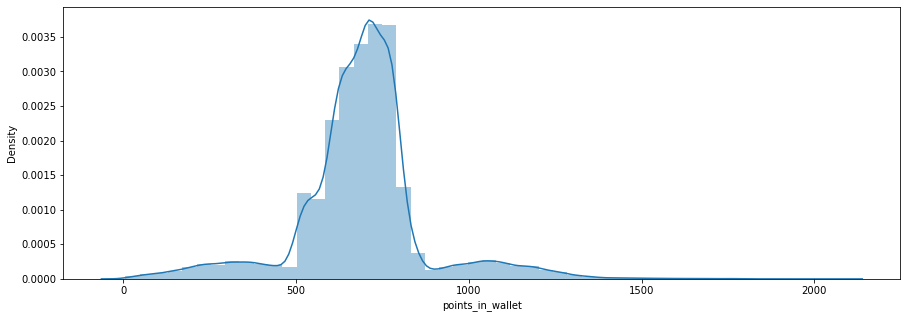

In [47]:
plt.figure(figsize = (15,5))
sns.distplot(new_df['points_in_wallet'])

### used special discount

In [48]:
check_null_nan(new_df['used_special_discount'],True)

so luong cua tung loai trong cot: 
Yes    20312
No     16621
Name: used_special_discount, dtype: int64
khong co Null nao trong cot
khong co NaN nao trong cot


<AxesSubplot:ylabel='used_special_discount'>

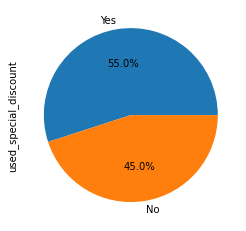

In [49]:
new_df['used_special_discount'].value_counts().plot.pie(autopct='%1.1f%%')

c:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='used_special_discount', ylabel='count'>

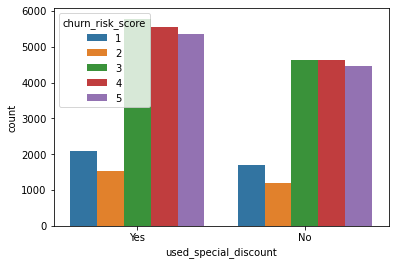

In [50]:
sns.countplot(new_df['used_special_discount'], hue = new_df['churn_risk_score'])

### past complaint

In [51]:
check_null_nan(new_df['past_complaint'],True)

so luong cua tung loai trong cot: 
No     18573
Yes    18360
Name: past_complaint, dtype: int64
khong co Null nao trong cot
khong co NaN nao trong cot


c:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='past_complaint', ylabel='count'>

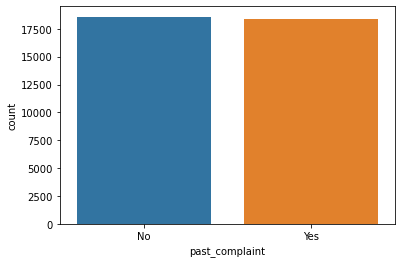

In [52]:
sns.countplot(new_df['past_complaint'])

### complaint status

In [53]:
check_null_nan(new_df['complaint_status'],True)

so luong cua tung loai trong cot: 
Not Applicable              18573
Unsolved                     4634
Solved                       4611
Solved in Follow-up          4571
No Information Available     4544
Name: complaint_status, dtype: int64
khong co Null nao trong cot
khong co NaN nao trong cot


c:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='complaint_status', ylabel='count'>

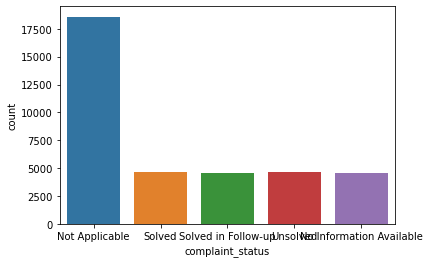

In [54]:
sns.countplot(new_df['complaint_status'])

nhung khach hang nao 'past_complaint' la 'No', thi 'complaint_status' cua ho la 'Not Applicable'
nhung khach hang nao 'past_complaint' la 'Yes', thi 'complaint_status' cua ho la [Solved in Follow-up, No Information Available, Unsolved, Solved]

c:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='complaint_status', ylabel='count'>

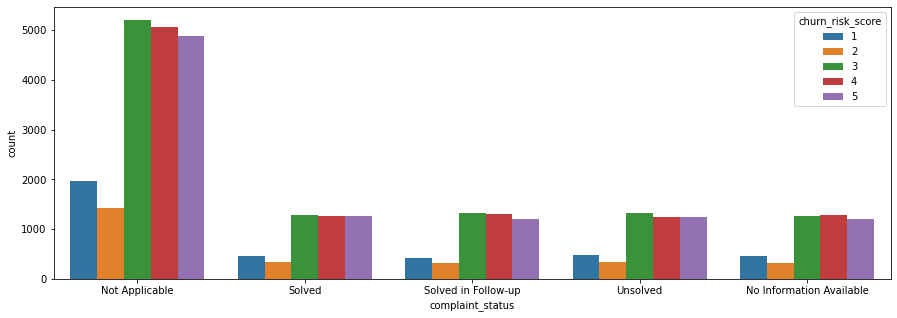

In [55]:
plt.figure(figsize = (15, 5)) 
sns.countplot(new_df['complaint_status'], hue = new_df['churn_risk_score'])

day cho thay nhung khach hang nao truoc day da tung co complaint thi ty le churn cua ho rat cao 

### feed back

In [56]:
check_null_nan(new_df['feedback'],True)

so luong cua tung loai trong cot: 
Poor Product Quality        6339
No reason specified         6282
Too many ads                6270
Poor Website                6261
Poor Customer Service       6238
Reasonable Price            1417
User Friendly Website       1390
Products always in Stock    1379
Quality Customer Care       1357
Name: feedback, dtype: int64
khong co Null nao trong cot
khong co NaN nao trong cot


c:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


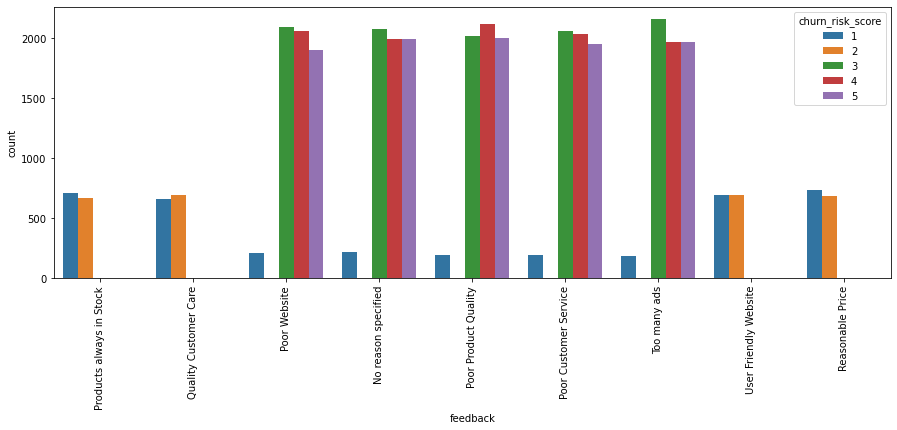

In [57]:
plt.figure(figsize = (15,5))
sns.countplot(new_df['feedback'], hue = new_df['churn_risk_score'])
plt.xticks(rotation = 90)
plt.show()

theo hinh tren thi feedback ve products always in stock, quanlity customer care, user friendly, reasonable price thi ty le churn o muc 1 2 khong anh huong manh den churn cua khach hang. con nhung cac con lai thi churn cua khach hang nam o muc 3,4,5 kha cao.

### xu ly cot ngay thang va thoi gian

In [58]:
target = new_df.iloc[:,-1]
new_df = new_df.drop(['churn_risk_score'],axis=1)
new_df.head()

,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,18,F,Village,Platinum Membership,2017-08-17,No,Gift Vouchers/Coupons,Desktop,Wi-Fi,16:08:02,17.0,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock
1,32,F,City,Premium Membership,2017-08-28,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,12:38:13,16.0,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care
2,44,F,Town,No Membership,2016-11-11,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,22:53:21,14.0,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website
3,37,M,City,No Membership,2016-10-29,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,15:57:50,11.0,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website
4,31,F,City,No Membership,2017-09-12,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,15:46:44,20.0,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website


In [59]:
# ham tach nam, thang, ngay
def splt_fun_year(val):
    x = val.split('-')
    return x[0]

def splt_fun_month(val):
    x = val.split('-')
    return x[1]

def splt_fun_day(val):
    x = val.split('-')
    return x[2]
joining_date = pd.DataFrame()
joining_date['joining_date_year'] = pd.to_numeric(new_df['joining_date'].apply(splt_fun_year))
joining_date['joining_date_month'] = pd.to_numeric(new_df['joining_date'].apply(splt_fun_month))
joining_date['joining_date_day'] = pd.to_numeric(new_df['joining_date'].apply(splt_fun_day))

In [60]:
# ham tach phut, gio
def splt_fun_hr(val):
    x = val.split(':')
    return x[0]

def splt_fun_min(val):
    x = val.split(':')
    return x[1]
last_visit_time = pd.DataFrame()
last_visit_time['last_visit_hour'] = pd.to_numeric(new_df['last_visit_time'].apply(splt_fun_hr))
last_visit_time['last_visit_min'] = pd.to_numeric(new_df['last_visit_time'].apply(splt_fun_min))

ghep tat ca cac cot lai

In [61]:
new_df = new_df.drop(['joining_date','last_visit_time'],axis=1)
data = pd.concat([new_df,joining_date,last_visit_time,target],axis=1)
data.head()

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,...,offer_application_preference,past_complaint,complaint_status,feedback,joining_date_year,joining_date_month,joining_date_day,last_visit_hour,last_visit_min,churn_risk_score
0,18,F,Village,Platinum Membership,No,Gift Vouchers/Coupons,Desktop,Wi-Fi,17.0,300.63,...,Yes,No,Not Applicable,Products always in Stock,2017,8,17,16,8,2
1,32,F,City,Premium Membership,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,16.0,306.34,...,No,Yes,Solved,Quality Customer Care,2017,8,28,12,38,1
2,44,F,Town,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,14.0,516.16,...,Yes,Yes,Solved in Follow-up,Poor Website,2016,11,11,22,53,5
3,37,M,City,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,11.0,53.27,...,Yes,Yes,Unsolved,Poor Website,2016,10,29,15,57,5
4,31,F,City,No Membership,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,20.0,113.13,...,Yes,Yes,Solved,Poor Website,2017,9,12,15,46,5


In [62]:
data.shape

(36933, 24)

## Preprocessing

In [63]:
def preprocessing_data(df):
    """
    Preprocess your data (eg. Drop null datapoints or fill missing data)
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: preprocess data
    #df = df.dropna(axis=0)
    df.dropna(inplace=True)
    return df
churn_df = preprocessing_data(data)
churn_df.shape

(22555, 24)

In [64]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22555 entries, 0 to 36990
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           22555 non-null  int64  
 1   gender                        22555 non-null  object 
 2   region_category               22555 non-null  object 
 3   membership_category           22555 non-null  object 
 4   joined_through_referral       22555 non-null  object 
 5   preferred_offer_types         22555 non-null  object 
 6   medium_of_operation           22555 non-null  object 
 7   internet_option               22555 non-null  object 
 8   days_since_last_login         22555 non-null  float64
 9   avg_time_spent                22555 non-null  float64
 10  avg_transaction_value         22555 non-null  float64
 11  avg_frequency_login_days      22555 non-null  float64
 12  points_in_wallet              22555 non-null  float64
 13  u

## Feature Engineering

In [65]:
# ham nay dung de chuyen bien category thanh cac bien dang so roi rac
import category_encoders as ce
def ordinal_encode(data):
  """
  :param df: pandas DataFrame
  :return: pandas DataFrame
  """
  encoding_data=data.copy()
  encoder=ce.OrdinalEncoder(encoding_data)
  data_encoded=encoder.fit_transform(encoding_data)
  return data_encoded

In [66]:
# Heatmap
import seaborn as sns
def apply_feature_engineering(df):
    """
    Apply all feature engineering to transform your data into number
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: Normalize your data
    # extract two dataframe: dataframe with target column and dataframe without it.
    df_new = pd.DataFrame()
    df_without_tg = df.iloc[:,:-1]
    df_tg = df.iloc[:,-1]
    # if target column is object. convert it into number. 
    if df_tg.dtype == 'object':
        df_tg = ordinal_encode(df_tg)

    df_object_columns = df_without_tg.iloc[:, :].select_dtypes(include=['object']).columns
    if len(df_object_columns) != 0:

        # remove all categorical features
        df_num = df_without_tg.drop(df_object_columns,axis=1)
        
        # create new object dataframe 
        df_le = df[df_object_columns]
        df_le = ordinal_encode(df_le)
        # concat two dataframe above
        df_new = pd.concat([df_num, df_le], axis=1)
    
    return pd.concat([df_new,df_tg],axis=1)

churn_df = apply_feature_engineering(churn_df)

In [67]:
churn_df.shape

(22555, 24)

<AxesSubplot:>

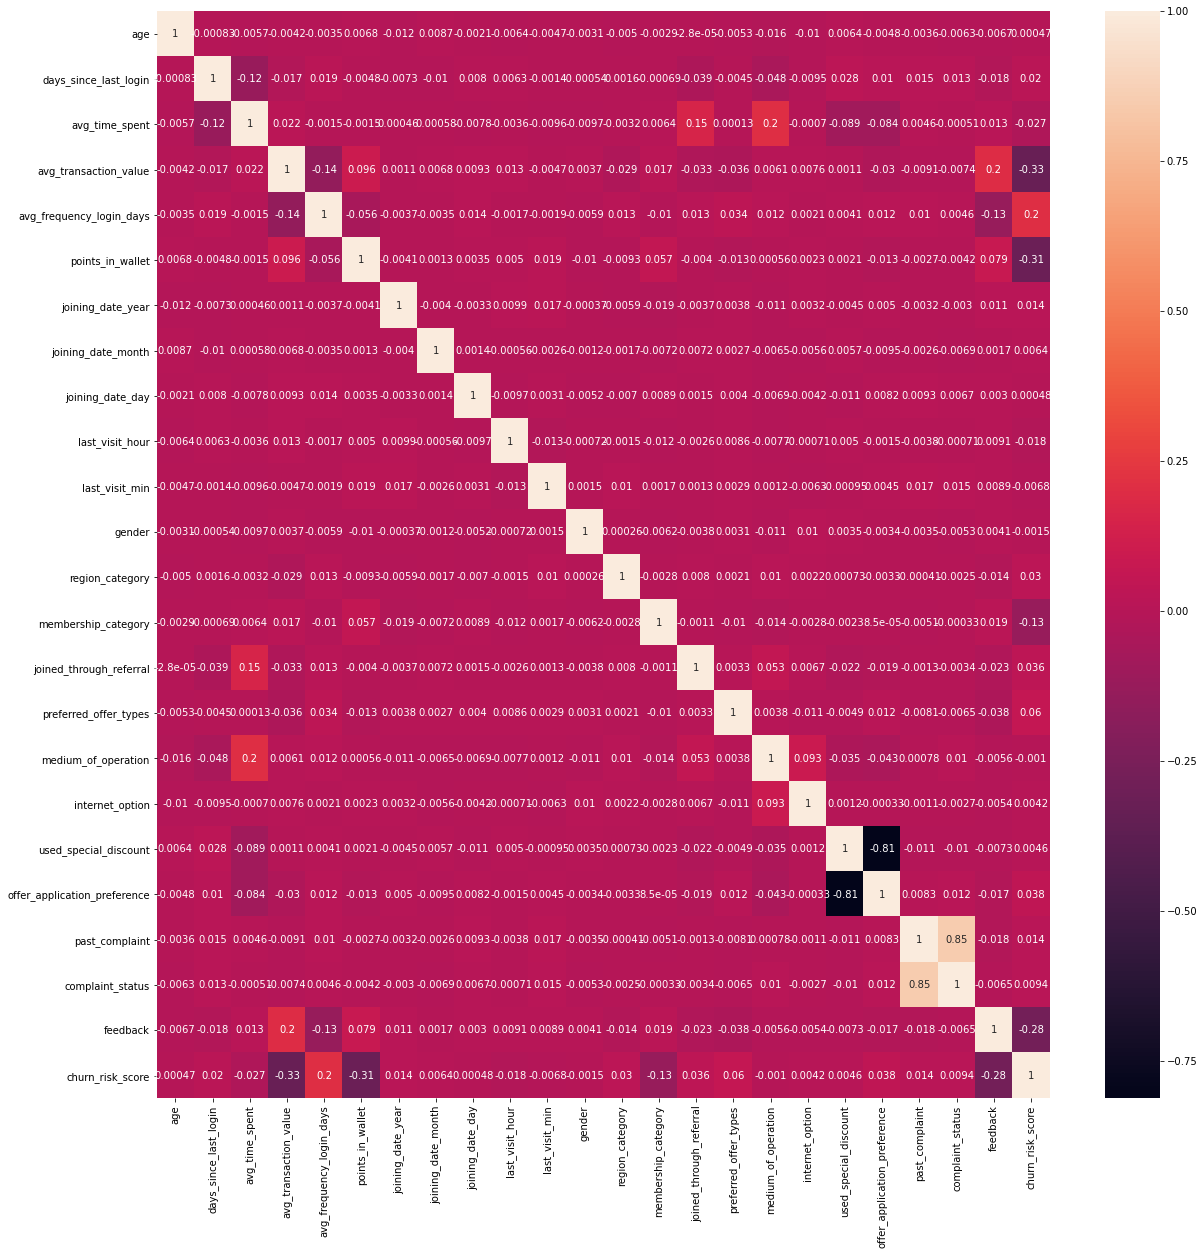

In [68]:
plt.figure(figsize=(20, 20))
sns.heatmap(churn_df.corr(),annot=True) # Show heatmap after normalized data

In [69]:
churn_df.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,joining_date_year,joining_date_month,joining_date_day,last_visit_hour,...,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,18,17.0,300.63,53005.25,17.0,781.75,2017,8,17,16,...,1,1,1,1,1,1,1,1,1,2
2,44,14.0,516.16,21027.00,22.0,500.69,2016,11,11,22,...,2,1,1,1,2,1,2,2,2,5
3,37,11.0,53.27,25239.56,6.0,567.66,2016,10,29,15,...,2,1,1,2,2,1,2,3,2,5
4,31,20.0,113.13,24483.66,16.0,663.06,2017,9,12,15,...,1,2,2,2,2,1,2,4,2,5
5,13,23.0,433.62,13884.77,24.0,722.27,2016,1,8,6,...,1,1,1,1,1,2,2,3,3,3


In [70]:
from sklearn.preprocessing import LabelEncoder
def prepare_X_y(df):
    """
    Feature engineering and create X and y
    :param df: pandas dataframe
    :return: (X, y) output feature matrix (dataframe), target (series)
    """
    # Todo: Split data into X and y (using sklearn train_test_split). Return two dataframes
    target = df.columns[-1]
    X = df.drop(target, axis=1).values
    y = df[target].values
    encoder = LabelEncoder()
    y = encoder.fit_transform(y)
    return X, y

X, y = prepare_X_y(churn_df)

# Apply machine learning model

## Train-test split

In [71]:
from sklearn.model_selection import train_test_split
RANDOM_STATE = 42
TRAIN_SIZE = 0.8

trainX, testX ,trainY, testY = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

## sampling data 

In [72]:

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# Instantiate SMOTE with sampling_strategy = 'not majority' to balance all classes equally
sm = SMOTE(sampling_strategy='not majority')

# Apply SMOTE to the training data
oversampled_X, oversampled_Y = sm.fit_resample(trainX, trainY)


## Build SK-learn model

4. Build Model
    4. a. Try DecisionTree, RandomForest
    4. b. Try other tree-based model like: XGBoost, CatBoost
5. Perform model on training set and test set using gridsearch CV

<AxesSubplot:>

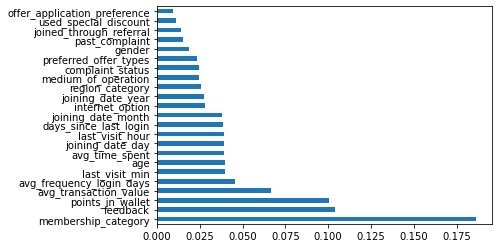

In [73]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(trainX,trainY)
feat_importances=pd.Series(model.feature_importances_,index=churn_df.iloc[:,:-1].columns)
feat_importances.nlargest(66).plot(kind='barh')

In [74]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostClassifier
from sklearn.preprocessing import LabelEncoder

In [75]:
def build_model(X, y, type):
    """
    Design your model and train it (including your best params)
    :param X: feature matrix
    :param y: target
    :return: a model
    """
    dt_model = DecisionTreeClassifier()
    rf_model = RandomForestClassifier()
    xgb_model = XGBClassifier()
    cat_model = CatBoostClassifier()

    dt_params = {'decision tree__criterion': ["gini", "entropy", "log_loss"]}
    
    rf_params = {'random forest__n_estimators': [10, 50, 100], 
                 'random forest__max_depth': [None, 5, 10], 
                 'random forest__min_samples_split': [2, 5, 10]}
    
    xgb_params = {'XGB boost__max_depth': [3, 5, 10], 
                  'XGB boost__learning_rate': [0.01, 0.1, 1]}
    
    cat_params = {'cat boost__iterations': [3, 5, 10, 20], 
                  'cat boost__learning_rate': [0.01, 0.1, 1]}


    dt_pipeline = Pipeline(steps=[ 
        ('StandardScaler',StandardScaler()),
        ('decision tree',dt_model)
    ])

    rf_pipeline = Pipeline([
        ('StandardScaler', StandardScaler()),
        ('random forest',rf_model)
    ])

    xgb_pipeline = Pipeline([
        ('StandardScaler', StandardScaler()),
        ('XGB boost',xgb_model)
    ])

    cat_pipeline = Pipeline([
        ('StandardScaler', StandardScaler()),
        ('cat boost',cat_model)
    ])

    if str(type) == 'dt':
        dt_grid = GridSearchCV(dt_pipeline, param_grid=dt_params, cv=5)
        dt_grid.fit(X, y)
        return dt_grid
    
    if type == 'rf':
        rf_grid = GridSearchCV(rf_pipeline, param_grid=rf_params, cv=5)
        rf_grid.fit(X, y)
        return rf_grid
    
    if type == 'xgb':
        xgb_grid = GridSearchCV(xgb_pipeline, param_grid= xgb_params, cv = 5)
        xgb_grid.fit(X,y)
        return xgb_grid
    
    if type == 'cat':
        cat_grid = GridSearchCV(cat_pipeline, param_grid= cat_params, cv = 5)
        cat_grid.fit(X,y)
        return cat_grid


In [76]:
def calculate_performance(y_true, y_pred):
    """

    :param y_true: ground truth values
    :param y_pred: predictions
    :return:
    """
    # Todo: return your error value like accuracy, f1score, ...
    print("precision", precision_score(y_true,y_pred,average=None))
    print("recall", recall_score(y_true,y_pred,average=None))
    print("accuracy", accuracy_score(y_true,y_pred))
    print("F1", f1_score(y_true,y_pred,average=None))
    print("Classification report: \n", classification_report(y_true , y_pred))

    # Todo: Only choose one of them as your score for the question 7
    return 

In [77]:
# train
model_dt_train = build_model(trainX, trainY,type='dt')
# test
model_dt_test = build_model(testX, testY,type='dt')
# balanced data
model_dt_train_ba = build_model(oversampled_X,oversampled_Y,type='dt')

In [78]:
# train
model_rf_train = build_model(trainX, trainY,type='rf')
# test
model_rf_test = build_model(testX, testY,type='rf')
# balanced data
model_rf_train_ba = build_model(oversampled_X,oversampled_Y,type='rf')

In [79]:
# train
model_xgb_train = build_model(trainX,trainY,type='xgb')
# test
model_xgb_test = build_model(testX,testY,type='xgb')
# balanced data
model_xgb_train_ba = build_model(oversampled_X,oversampled_Y,type='xgb')

In [80]:
# train
model_cat_train = build_model(trainX, trainY,type='cat')
# test
model_cat_test = build_model(trainX, trainY,type='cat')
# balanced data
model_cat_train_ba = build_model(oversampled_X,oversampled_Y,type='cat')

0:	learn: 1.5904112	total: 68.6ms	remaining: 137ms
1:	learn: 1.5723806	total: 78.2ms	remaining: 39.1ms
2:	learn: 1.5543443	total: 86ms	remaining: 0us
0:	learn: 1.5904935	total: 10.8ms	remaining: 21.6ms
1:	learn: 1.5729116	total: 21ms	remaining: 10.5ms
2:	learn: 1.5548785	total: 28.9ms	remaining: 0us
0:	learn: 1.5902477	total: 9.47ms	remaining: 18.9ms
1:	learn: 1.5727553	total: 19ms	remaining: 9.48ms
2:	learn: 1.5545573	total: 27.3ms	remaining: 0us
0:	learn: 1.5907708	total: 9.15ms	remaining: 18.3ms
1:	learn: 1.5729998	total: 18.6ms	remaining: 9.31ms
2:	learn: 1.5550167	total: 26.8ms	remaining: 0us
0:	learn: 1.5904409	total: 9.13ms	remaining: 18.3ms
1:	learn: 1.5727723	total: 17.2ms	remaining: 8.59ms
2:	learn: 1.5546993	total: 26.7ms	remaining: 0us
0:	learn: 1.4281501	total: 11ms	remaining: 22ms
1:	learn: 1.3015846	total: 19.5ms	remaining: 9.76ms
2:	learn: 1.2036664	total: 28.5ms	remaining: 0us
0:	learn: 1.4289304	total: 8.82ms	remaining: 17.6ms
1:	learn: 1.3047562	total: 17ms	remaining

In [81]:
def compare_train_test_set(model_train,model_test,model_ba):
    print('TRAIN SET: ')
    print("Best parameters:", model_train.best_params_)
    print("Best Accuracy Score: {:.2f}%".format(model_train.best_score_ * 100))
    print('\n --------------')
    print('TEST SET: ')
    print("Best parameters:", model_test.best_params_)
    print("Best Accuracy Score: {:.2f}%".format(model_test.best_score_ * 100))
    print('\n --------------')
    print('OVERSAMPLING SET: ')
    print("Best parameters:", model_ba.best_params_)
    print("Best Accuracy Score: {:.2f}%".format(model_ba.best_score_ * 100))
    return 

### decistion tree

In [82]:
compare_train_test_set(model_dt_train, model_dt_test,model_dt_train_ba)

TRAIN SET: 
Best parameters: {'decision tree__criterion': 'entropy'}
Best Accuracy Score: 73.82%

 --------------
TEST SET: 
Best parameters: {'decision tree__criterion': 'entropy'}
Best Accuracy Score: 72.47%

 --------------
OVERSAMPLING SET: 
Best parameters: {'decision tree__criterion': 'log_loss'}
Best Accuracy Score: 73.86%


In [83]:
calculate_performance(testY, model_dt_train_ba.predict(testX))

precision [0.49423077 0.72826087 0.89558233 0.66027178 0.71694765]
recall [0.54334038 0.71849866 0.87245696 0.66345382 0.70753065]
accuracy 0.7257814231877633
F1 [0.51762336 0.72334683 0.88386841 0.66185897 0.71220802]
Classification report: 
               precision    recall  f1-score   support

           0       0.49      0.54      0.52       473
           1       0.73      0.72      0.72       373
           2       0.90      0.87      0.88      1278
           3       0.66      0.66      0.66      1245
           4       0.72      0.71      0.71      1142

    accuracy                           0.73      4511
   macro avg       0.70      0.70      0.70      4511
weighted avg       0.73      0.73      0.73      4511



In [84]:
from sklearn.metrics import roc_auc_score
y_pred = model_dt_train_ba.predict_proba(oversampled_X)
auc_roc = roc_auc_score(oversampled_Y,y_pred,multi_class='ovr')
auc_roc

1.0

### random forest

In [85]:
compare_train_test_set(model_rf_train, model_rf_test,model_rf_train_ba)

TRAIN SET: 
Best parameters: {'random forest__max_depth': None, 'random forest__min_samples_split': 5, 'random forest__n_estimators': 100}
Best Accuracy Score: 76.35%

 --------------
TEST SET: 
Best parameters: {'random forest__max_depth': None, 'random forest__min_samples_split': 5, 'random forest__n_estimators': 100}
Best Accuracy Score: 74.33%

 --------------
OVERSAMPLING SET: 
Best parameters: {'random forest__max_depth': None, 'random forest__min_samples_split': 2, 'random forest__n_estimators': 100}
Best Accuracy Score: 78.56%


In [86]:
calculate_performance(testY, model_rf_train_ba.predict(testX))

precision [0.72702703 0.79591837 0.8680203  0.69122517 0.70850537]
recall [0.56871036 0.73190349 0.93661972 0.67068273 0.75131349]
accuracy 0.760806916426513
F1 [0.63819692 0.76256983 0.90101618 0.68079902 0.72928177]
Classification report: 
               precision    recall  f1-score   support

           0       0.73      0.57      0.64       473
           1       0.80      0.73      0.76       373
           2       0.87      0.94      0.90      1278
           3       0.69      0.67      0.68      1245
           4       0.71      0.75      0.73      1142

    accuracy                           0.76      4511
   macro avg       0.76      0.73      0.74      4511
weighted avg       0.76      0.76      0.76      4511



In [87]:
from sklearn.metrics import roc_auc_score
y_pred = model_rf_train_ba.predict_proba(oversampled_X)
auc_roc = roc_auc_score(oversampled_Y,y_pred,multi_class='ovr')
auc_roc

1.0

### XGB

In [88]:
compare_train_test_set(model_xgb_train, model_xgb_test,model_xgb_train_ba)

TRAIN SET: 
Best parameters: {'XGB boost__learning_rate': 0.1, 'XGB boost__max_depth': 3}
Best Accuracy Score: 77.74%

 --------------
TEST SET: 
Best parameters: {'XGB boost__learning_rate': 0.1, 'XGB boost__max_depth': 3}
Best Accuracy Score: 77.77%

 --------------
OVERSAMPLING SET: 
Best parameters: {'XGB boost__learning_rate': 1, 'XGB boost__max_depth': 10}
Best Accuracy Score: 80.32%


In [89]:
calculate_performance(testY, model_xgb_train_ba.predict(testX))

precision [0.7176781  0.79300292 0.89618321 0.68       0.7184703 ]
recall [0.57505285 0.72922252 0.91862285 0.68273092 0.7732049 ]
accuracy 0.7650188428286411
F1 [0.63849765 0.75977654 0.9072643  0.68136273 0.7448334 ]
Classification report: 
               precision    recall  f1-score   support

           0       0.72      0.58      0.64       473
           1       0.79      0.73      0.76       373
           2       0.90      0.92      0.91      1278
           3       0.68      0.68      0.68      1245
           4       0.72      0.77      0.74      1142

    accuracy                           0.77      4511
   macro avg       0.76      0.74      0.75      4511
weighted avg       0.76      0.77      0.76      4511



In [90]:
from sklearn.metrics import roc_auc_score
y_pred = model_xgb_train_ba.predict_proba(oversampled_X)
auc_roc = roc_auc_score(oversampled_Y,y_pred,multi_class='ovr')
auc_roc

1.0

### CatBoot

In [91]:
compare_train_test_set(model_cat_train, model_xgb_test,model_cat_train_ba)

TRAIN SET: 
Best parameters: {'cat boost__iterations': 20, 'cat boost__learning_rate': 0.1}
Best Accuracy Score: 75.60%

 --------------
TEST SET: 
Best parameters: {'XGB boost__learning_rate': 0.1, 'XGB boost__max_depth': 3}
Best Accuracy Score: 77.77%

 --------------
OVERSAMPLING SET: 
Best parameters: {'cat boost__iterations': 20, 'cat boost__learning_rate': 1}
Best Accuracy Score: 74.38%


In [92]:
calculate_performance(testY, model_cat_train_ba.predict(testX))

precision [0.72268908 0.76859504 0.89559165 0.71374765 0.68384401]
recall [0.54545455 0.74798928 0.90610329 0.60883534 0.85989492]
accuracy 0.7614719574373753
F1 [0.62168675 0.75815217 0.9008168  0.65713047 0.76183088]
Classification report: 
               precision    recall  f1-score   support

           0       0.72      0.55      0.62       473
           1       0.77      0.75      0.76       373
           2       0.90      0.91      0.90      1278
           3       0.71      0.61      0.66      1245
           4       0.68      0.86      0.76      1142

    accuracy                           0.76      4511
   macro avg       0.76      0.73      0.74      4511
weighted avg       0.76      0.76      0.76      4511



In [93]:
from sklearn.metrics import roc_auc_score
y_pred = model_cat_train_ba.predict_proba(oversampled_X)
auc_roc = roc_auc_score(oversampled_Y,y_pred,multi_class='ovr')
auc_roc

0.9570322873350324

chọn AUC-ROC curve. bởi vì AUC-ROC, Nó cho biết mô hình có khả năng phân biệt bao nhiêu giữa các classes. 
AUC càng cao thi model đoán đúng những class càng cao. 
F1 score, bởi vì bộ dữ liệu của chúng ta không cân bằng. nên chọn recall hay precision dều không chính xác. nhưng F1 score nó sẽ diều hoà cân bằng của recall va precision.

In [94]:
def get_conclusion():
    # Todo: Please return your answer, conclusion and opinion right here
    return "7. " \
           "Other conclusion: "